In [86]:
import urllib
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib.request.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)
print(len(df))

8124


In [87]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [88]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])

In [89]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [90]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)        
    df[i] = df[i].map(map_dic_sub)

In [91]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [92]:
data_df = df.iloc[:, 1:]
data_df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [93]:
data_array = data_df.as_matrix()
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (8124, 22)


In [94]:
label_df = df.iloc[:, 0:1]

label_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [95]:
label_array = label_df.as_matrix()
print(type(label_array), label_array.shape)
label_array_one_hot = []
for i in label_array:
    if i == 0:
        one_hot = [1, 0]
    else:
        one_hot = [0, 1]
    label_array_one_hot.append(one_hot)

label_array_one_hot =  np.array(label_array_one_hot)

<class 'numpy.ndarray'> (8124, 1)


In [96]:
label_array_one_hot =  np.array(label_array_one_hot)

In [97]:
print(type(label_array_one_hot), label_array_one_hot.shape)

<class 'numpy.ndarray'> (8124, 2)


In [98]:
train = {'data': None, 'labels': None}
validation = {'data': None, 'labels': None}
test = {'data': None, 'labels': None}


In [99]:
import random
pick = random.random()
train_data = []
train_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []
for i in range(len(data_array)):
    pick = random.random()
    if pick < 0.80:
        train_data.append(data_array[i])
        train_labels.append(label_array_one_hot[i])
    elif pick >= 0.80 and pick < 0.85:
        validation_data.append(data_array[i])
        validation_labels.append(label_array_one_hot[i])
    elif pick >= 0.85:
        test_data.append(data_array[i])
        test_labels.append(label_array_one_hot[i])
        
train['data'] = np.array(train_data)
train['labels'] = np.array(train_labels)
validation['data'] = np.array(validation_data)
validation['labels'] = np.array(validation_labels)
test['data'] = np.array(test_data)
test['labels'] = np.array(test_labels)

In [100]:
print(train['data'].shape, train['labels'].shape)

(6511, 22) (6511, 2)


In [101]:
print(train['data'])
print(train['labels'])

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.11111111 ...,  0.125       0.2         0.16666667]
 [ 0.2         0.          0.22222222 ...,  0.125       0.2         0.33333333]
 ..., 
 [ 0.6         0.          0.         ...,  1.          1.          1.        ]
 [ 0.8         0.33333333  0.         ...,  0.5         0.6         1.        ]
 [ 0.          0.          0.         ...,  0.75        1.          1.        ]]
[[1 0]
 [0 1]
 [0 1]
 ..., 
 [0 1]
 [1 0]
 [0 1]]


In [102]:
print(validation['data'].shape, validation['labels'].shape)

(434, 22) (434, 2)


In [103]:
print(validation['data'])
print(validation['labels'])

[[ 0.          0.33333333  0.22222222 ...,  0.          0.6         0.16666667]
 [ 0.          0.33333333  0.11111111 ...,  0.          0.          0.33333333]
 [ 0.          0.66666667  0.         ...,  0.          0.4         0.16666667]
 ..., 
 [ 0.          0.33333333  0.88888889 ...,  0.5         1.          0.5       ]
 [ 0.6         0.          0.         ...,  1.          0.6         1.        ]
 [ 0.8         0.          0.22222222 ...,  0.5         0.2         0.16666667]]
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 

In [104]:
print(test['data'].shape, test['labels'].shape)

(1179, 22) (1179, 2)


In [105]:
print(test['data'])
print(test['labels'])

[[ 0.          0.33333333  0.22222222 ...,  0.125       0.6         0.        ]
 [ 0.6         0.66666667  0.22222222 ...,  0.125       0.4         0.16666667]
 [ 0.          0.33333333  0.22222222 ...,  0.125       0.          0.        ]
 ..., 
 [ 0.8         0.          0.44444444 ...,  0.5         0.6         0.66666667]
 [ 0.          0.          0.         ...,  0.125       1.          1.        ]
 [ 0.8         0.          0.         ...,  0.125       0.6         1.        ]]
[[1 0]
 [0 1]
 [1 0]
 ..., 
 [1 0]
 [0 1]
 [0 1]]


# 3. homework

In [106]:
import tensorflow as tf
import math

- Layer Neural Network

In [109]:
batch_size = 30 # batch size는 30으로 설정
training_epochs = 100 
learning_rate = 0.05 

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 22 # 데이터의 컬럼은 22개 
n_hidden_1 = 10 # hidden laye의 갯수는 2개. 첫 번째 hidden layer의 neuron 갯수는 10개로 설정
n_hidden_2 = 10 # hidden laye의 갯수는 2개. 첫 번째 hidden layer의 neuron 갯수는 10개로 설정
n_classes = 2 # total classes (두 개의 클래스 : 독버섯, 식용버섯)
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2nd Hidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

Total batch: 218
Epoch:  0, Train Error: 6.59926, Validation Error: 7.02636, Test Accuracy: 0.44444
Epoch:  1, Train Error: 0.71079, Validation Error: 0.77043, Test Accuracy: 0.63020
Epoch:  2, Train Error: 0.30446, Validation Error: 0.32014, Test Accuracy: 0.84224
Epoch:  3, Train Error: 0.24603, Validation Error: 0.24916, Test Accuracy: 0.88295
Epoch:  4, Train Error: 0.20026, Validation Error: 0.18895, Test Accuracy: 0.90416
Epoch:  5, Train Error: 0.16311, Validation Error: 0.14628, Test Accuracy: 0.93469
Epoch:  6, Train Error: 0.15384, Validation Error: 0.13253, Test Accuracy: 0.94572
Epoch:  7, Train Error: 0.13927, Validation Error: 0.11577, Test Accuracy: 0.95420
Epoch:  8, Train Error: 0.12198, Validation Error: 0.09789, Test Accuracy: 0.96014
Epoch:  9, Train Error: 0.10800, Validation Error: 0.08407, Test Accuracy: 0.96522
Epoch: 10, Train Error: 0.09450, Validation Error: 0.07176, Test Accuracy: 0.96947
Epoch: 11, Train Error: 0.08232, Validation Error: 0.06081, Test Accur

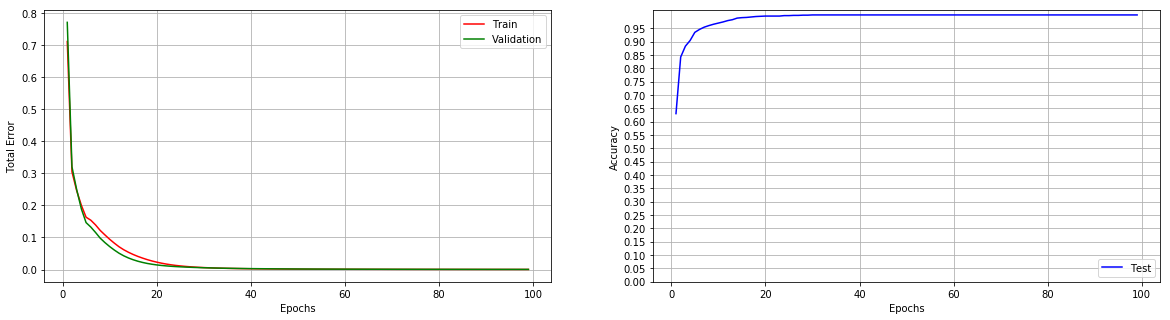

[0 1 0 ..., 0 1 1]
[0 1 0 ..., 0 1 1]
Number of False Prediction: 0


In [108]:
def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction():
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        #img = np.array(mnist.test.images[j])
        #img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        #plt.imshow(img, cmap='gray')

def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l), :]
        
        
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(len(train['data'])/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target: validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        #for i in range(len(train['data'])):
        #    sess.run(optimizer, feed_dict={x: train['data'], y_target: train['labels']})
        for i in range(total_batch):
            batch_images = train['data'][i*batch_size: (i+1)*batch_size]
            batch_labels = train['labels'][i*batch_size: (i+1)*batch_size]
        #    print(batch_images)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
            
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:test['data']})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:test['labels']})

    print(prediction)
    print(ground_truth)

    for i in range(len(test['data'])):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))

In [110]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(len(train['data'])/float(batch_size)))
    print("Total batch: %d" % total_batch)
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target: validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_data = train['data'][i*batch_size: (i+1)*batch_size]
            batch_labels = train['labels'][i*batch_size: (i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: batch_data, y_target: batch_labels})

Total batch: 218
Epoch:  0, Train Error: 20.21080, Validation Error: 20.32619, Test Accuracy: 0.49703
Epoch:  1, Train Error: 0.61841, Validation Error: 0.67011, Test Accuracy: 0.78541
Epoch:  2, Train Error: 0.21125, Validation Error: 0.20685, Test Accuracy: 0.95844
Epoch:  3, Train Error: 0.14389, Validation Error: 0.14218, Test Accuracy: 0.96947
Epoch:  4, Train Error: 0.11811, Validation Error: 0.11999, Test Accuracy: 0.97201
Epoch:  5, Train Error: 0.10522, Validation Error: 0.11027, Test Accuracy: 0.97455
Epoch:  6, Train Error: 0.09811, Validation Error: 0.10522, Test Accuracy: 0.97540
Epoch:  7, Train Error: 0.09271, Validation Error: 0.10094, Test Accuracy: 0.97710
Epoch:  8, Train Error: 0.08769, Validation Error: 0.09647, Test Accuracy: 0.97880
Epoch:  9, Train Error: 0.08400, Validation Error: 0.09307, Test Accuracy: 0.97964
Epoch: 10, Train Error: 0.08050, Validation Error: 0.08961, Test Accuracy: 0.97964
Epoch: 11, Train Error: 0.07690, Validation Error: 0.08590, Test Acc

Epoch: 99, Train Error: 0.00036, Validation Error: 0.00073, Test Accuracy: 1.00000
